In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
from sklearn import decomposition



In [4]:
from mpl_toolkits.mplot3d import Axes3D


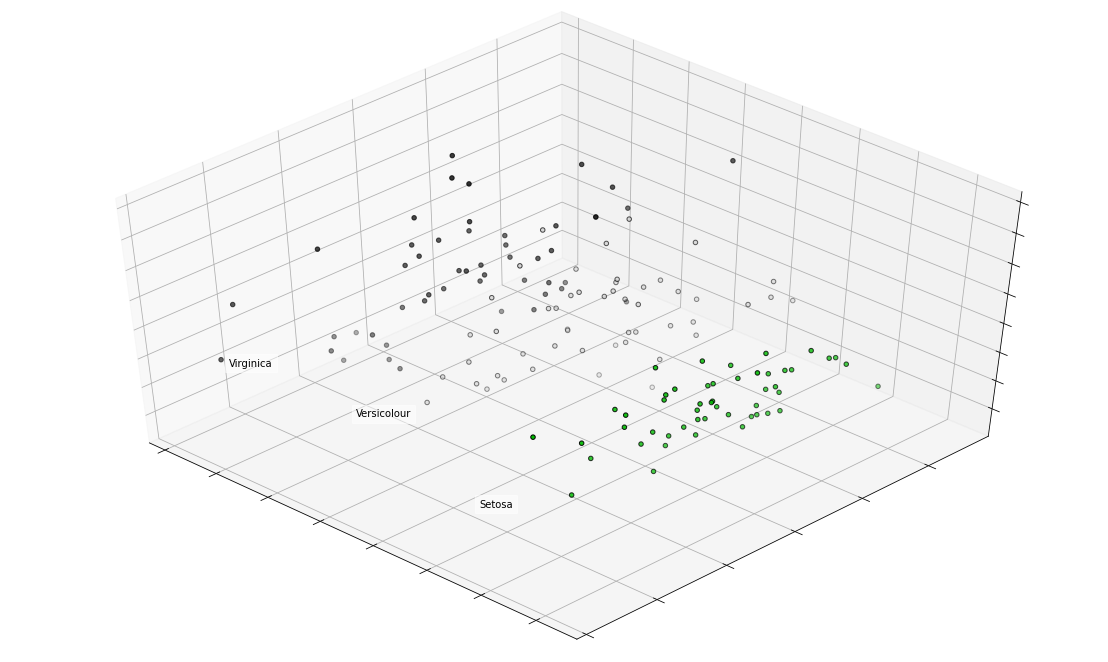

In [6]:
from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(16, 9))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

In [ ]:
import networkx as nx

#G=nx.DiGraph()

MG=nx.DiGraph()
import matplotlib.pyplot as plt
%matplotlib inline


#chr2:89570800-89686000_3
with open('/panfs/qcb-panasas/rdagnew/HG00514/clr.pbmm/chr1:103655200-103725600_3/sda_out/snvs/sda.assembly.consensus.fragments') as f:
    nodes={}
    pos_set=set()
    reads=[]
    #read_name    {pos: 0/1,  ,  }
    for line in f.readlines():
        line=line.rstrip()
        vals=line.split()
        read=vals[0]
        reads.append(read)
        info=vals[3:]
        nodes[read]=[]
        for s in info:
            s=s.split(",")
            if s[2]==s[3] and (int(s[4])>3 or int(s[5])>3):
                nodes[read].append(s[0])
                pos_set.add(s[0])
                
    MG.add_nodes_from(pos_set)
    MG.add_node('s')
    MG.add_node('t')
    c=0
    for r in reads:
        i=0
        #print(nodes[r]){'read_name': r}
        for l in range(len(nodes[r])):
            if l==0:
                MG.add_edge('s',nodes[r][0])#,read_name=r)
            elif l==len(nodes[r])-1:
                MG.add_edge(nodes[r][l],'t' )#,read_name=r )
            elif l==len(nodes[r])-1 and l==0:
                MG.add_edge(nodes[r][0],'t' )#,read_name=r )
                MG.add_edge('s',nodes[r][0])#,read_name=r)
            else:
                MG.add_edge(nodes[r][l], nodes[r][l+1])#,read_name=r)
            i=i+1
        c=c+i    
    print(str(c))
    print(len(reads))
    print(MG.number_of_nodes())            
    print(MG.number_of_edges())
   # print(MG.edges)
            
nx.write_gml(MG,'/home/cmb-16/mjc/rdagnew/summerproj/kmer_filter/psv_graph.gml')       
        

fig = plt.figure(1, figsize=(16, 9))
nx.draw_spring(MG ,node_color='r', edge_color='b')#,with_labels=True)
#plt.show()
#plt.subplot(122)


pos=nx.spring_layout(MG)
nx.draw(MG,pos, node_color = 'r', node_size=100,edge_color='b',edge_cmap=plt.cm.Reds)
plt.show()

In [26]:

import networkx as nx



#G=nx.DiGraph()


MG=nx.DiGraph()
import matplotlib.pyplot as plt



In [31]:
nodes={}
pos_set=set()
reads=[]
kmer_set=set()
t=0
with open('/panfs/qcb-panasas/rdagnew/HG00514/pbmm_combined/filt/chr6:160610200-160646300/kmer_filter/reads.query_psv.alt.txt') as f:
    #read_name    {pos: 0/1,  ,  }
    for line in f.readlines():
        line=line.rstrip()
        vals=line.split()
        read=vals[0]
        pos=vals[1]
        reads.append(read)
        info=vals[2]
        ct=vals[3].split(",")
        nodes[read]=[]
        i=0
        for value in ct:
            if int(value)>0:
               # print(value)
                nodes[read].append(info[i:i+32])
                pos_set.add(int(pos)+i)
                kmer_set.add(info[i:i+32])
            i=i+1
        t=t+i   
      #  print(nodes[read])        
MG.add_nodes_from(kmer_set)

c=0
for r in reads:
    j=0
    term=len(nodes[r])-1
    if term<1:
        continue
    #print(term)
    #print(nodes[r]){'read_name': r}
    for l in range(len(nodes[r])-1):
        MG.add_edge(nodes[r][l], nodes[r][l+1])#,read_name=r)
        j=j+1
    #print(str(j),str(len(nodes[r])))
    MG.add_edge(nodes[r][0], nodes[r][term])#,read_name=r)
    c=c+j    

print(str(c),str(j),str(t))
print(len(reads))
print(MG.number_of_nodes())            
print(MG.number_of_edges())
# print(MG.edges)        

3024 6 14716546
694
173631
25


In [20]:
nx.write_gml(MG,'/panfs/qcb-panasas/rdagnew/HG00514/pbmm_combined/filt/chr6:160610200-160646300/kmer_filter/psv_graph.gml')

In [32]:
print(len(pos_set),len(kmer_set))

506918 173631
